In [43]:
from os import getcwd
from os.path import join, basename
from sys import path 

libs_dir = join("/".join(getcwd().split("/")[:-2]))
path.append(libs_dir)

filename = basename(globals()['__vsc_ipynb_file__']).split(".")[0]

import numpy as np
from libs.qchannel_model import *
import matplotlib.pyplot as plt
from libs.figure_config import *
from libs.default_parameters import *
import os

In [ ]:
p_dark = 1e-4

# After-pulsing probability
p_AP = 0

# Probability of the polarisation errors
e_pol = 0.033

n_s = 0.3

In [45]:
tau_zen_list = np.array([0.91, 0.53])
zenith_angle_deg_list = np.linspace(-60, 60, 20)

qber_values = np.zeros((len(tau_zen_list), len(zenith_angle_deg_list)))
yield_values = np.zeros((len(tau_zen_list), len(zenith_angle_deg_list)))
skr_values = np.zeros((len(tau_zen_list), len(zenith_angle_deg_list)))

In [46]:
for idx in range(len(tau_zen_list)):
    tau_zen = tau_zen_list[idx]
    for jdx in range(len(zenith_angle_deg_list)):
        zenith_angle_deg = zenith_angle_deg_list[jdx]
        
        if zenith_angle_deg < 0:
            zenith_angle_rad = np.radians(-zenith_angle_deg)
        else:
            zenith_angle_rad = np.radians(zenith_angle_deg)

        slant_distance = compute_slant_distance(h_s, h_OGS, zenith_angle_rad)
        w_L = slant_distance * theta_rad

        qber_values[idx][jdx], yield_values[idx][jdx] = compute_avg_qber(
            sigma_theta_x, sigma_theta_y, slant_distance, mu_x, mu_y,
            zenith_angle_rad, h_OGS, h_atm, w_L, tau_zen, Cn2_profile,
            a, e_0, p_dark, e_pol, p_AP, n_s, wavelength
        )

        Q_1, e_1 = compute_Q_1_e_1(
            sigma_theta_x, sigma_theta_y, slant_distance, mu_x, mu_y,
            zenith_angle_rad, h_OGS, h_atm, w_L, tau_zen, Cn2_profile,
            a, e_0, p_dark, e_pol, p_AP, n_s, wavelength
        )

        skr_values[idx][jdx] = compute_SKR(
            qber_values[idx][jdx], yield_values[idx][jdx], Q_1, e_1
        )

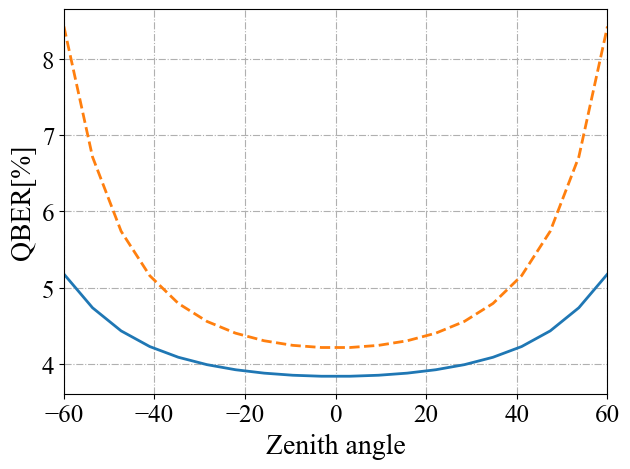

In [47]:
plt.plot(zenith_angle_deg_list, qber_values[0][:]*100)
plt.plot(zenith_angle_deg_list, qber_values[1][:]*100, ls='--')
# plt.plot(zenith_angle_deg_list, qber_values[2][:]*100)
# plt.plot(zenith_angle_deg_list, qber_values[3][:]*100)

plt.xlabel(r"Zenith angle")
plt.ylabel(r"QBER[%]")

plt.xlim(-60, 60)

plt.grid()
plt.tight_layout()
# plt.savefig(f'results/qber_{n_s}.png')
# print(f"✅ Saved as: qber_{n_s}.png")

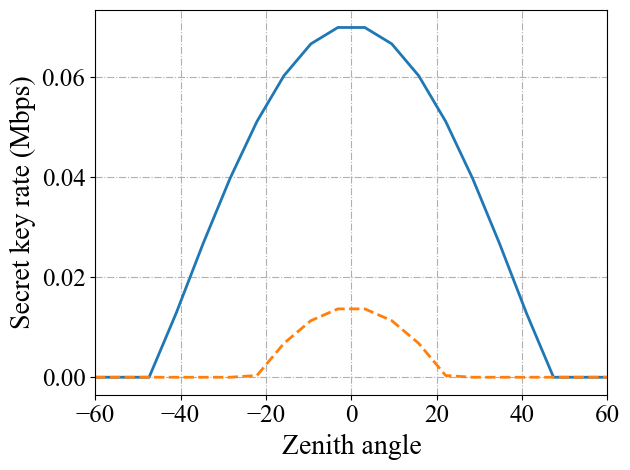

In [48]:
plt.plot(zenith_angle_deg_list, skr_values[0][:]/10**6)
plt.plot(zenith_angle_deg_list, skr_values[1][:]/10**6, ls='--')

# plt.plot(zenith_angle_deg_list, yield_values[0][:])
# plt.plot(zenith_angle_deg_list, yield_values[1][:], ls='--')

plt.xlabel(r"Zenith angle")
plt.ylabel(r"Secret key rate (Mbps)")

plt.xlim(-60, 60)

plt.grid()
plt.tight_layout()
# plt.savefig(f'results/skr_{n_s}.png')
# print(f"✅ Saved as: skr_{n_s}.png")